In [36]:
# 라이브러리 임포트
import requests
import pandas as pd
from io import StringIO

In [37]:
# 브라우저 없이 웹 정보 확인

code = '035420'

url = f'https://finance.naver.com/item/sise_day.naver?code={code}&page=2'

page = requests.get(url)

print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

In [38]:
# 웹 스크래핑 가능 유무 확인

my_headers = {'user-agent': 'Mozilla/5.0'}

url = f'https://finance.naver.com/item/sise_day.naver?code={code}&page=2'

page = requests.get(url, headers=my_headers)

print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버페이 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250411170222/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250411170222/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250411170222/css/finance_header.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250411170222/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250411170222/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250411170222/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20250411170222/css/newstock3.css">
<link rel="stylesheet" type

In [39]:
# 페이징 처리가 되어 있는 데이터

new_url = f'https://finance.naver.com/item/sise_day.naver?code={code}&page='

all_tables = pd.DataFrame()

for page_number in range(1, 11):
    full_url = new_url + str(page_number)

    print(f'{page} 번째 페이지 읽어오기 ({full_url})')

    page = requests.get(full_url, headers=my_headers)

    table = pd.read_html(StringIO(page.text))[0]

    print(f'전체 {len(all_tables.index)} 줄 에 {len(table.index)} 줄 추가')

    all_tables = pd.concat([all_tables, table], ignore_index=True)


<Response [200]> 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=035420&page=1)
전체 0 줄 에 15 줄 추가
<Response [200]> 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=035420&page=2)
전체 15 줄 에 15 줄 추가
<Response [200]> 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=035420&page=3)
전체 30 줄 에 15 줄 추가
<Response [200]> 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=035420&page=4)
전체 45 줄 에 15 줄 추가
<Response [200]> 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=035420&page=5)
전체 60 줄 에 15 줄 추가
<Response [200]> 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=035420&page=6)
전체 75 줄 에 15 줄 추가
<Response [200]> 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=035420&page=7)
전체 90 줄 에 15 줄 추가
<Response [200]> 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=035420&page=8)
전체 105 줄 에 15 줄 추가
<Response [200]> 번째 페이지 읽어오기 (https://finance.naver.com/item/sise_day.naver?code=035420&

In [40]:
# 결손치 제거
all_tables.dropna(inplace=True)

all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2025.04.17,183600.0,하락 800,184800.0,185400.0,182100.0,237641.0
2,2025.04.16,184400.0,상승 500,183900.0,186300.0,183000.0,427131.0
3,2025.04.15,183900.0,"상승 1,200",184800.0,186400.0,183700.0,345595.0
4,2025.04.14,182700.0,하락 300,183000.0,185100.0,182500.0,391419.0
5,2025.04.11,183000.0,하락 900,180200.0,184100.0,180100.0,569473.0
...,...,...,...,...,...,...,...
144,2024.11.25,193200.0,"상승 3,200",190100.0,193200.0,187400.0,2335917.0
145,2024.11.22,190000.0,상승 300,189600.0,190800.0,187400.0,759493.0
146,2024.11.21,189700.0,"하락 3,400",192600.0,192700.0,188900.0,887174.0
147,2024.11.20,193100.0,상승 100,193500.0,194000.0,191300.0,693589.0


In [41]:
# 열 이름을 영문으로 변경
all_tables.rename(columns={'날짜': 'Date',
                           '종가': 'end_price',
                           '시가': 'start_price',
                           '고가': 'higest_price',
                           '저가': 'lowest_price'},
                  inplace=True)
all_tables

,Date,end_price,전일비,start_price,higest_price,lowest_price,거래량
1,2025.04.17,183600.0,하락 800,184800.0,185400.0,182100.0,237641.0
2,2025.04.16,184400.0,상승 500,183900.0,186300.0,183000.0,427131.0
3,2025.04.15,183900.0,"상승 1,200",184800.0,186400.0,183700.0,345595.0
4,2025.04.14,182700.0,하락 300,183000.0,185100.0,182500.0,391419.0
5,2025.04.11,183000.0,하락 900,180200.0,184100.0,180100.0,569473.0
...,...,...,...,...,...,...,...
144,2024.11.25,193200.0,"상승 3,200",190100.0,193200.0,187400.0,2335917.0
145,2024.11.22,190000.0,상승 300,189600.0,190800.0,187400.0,759493.0
146,2024.11.21,189700.0,"하락 3,400",192600.0,192700.0,188900.0,887174.0
147,2024.11.20,193100.0,상승 100,193500.0,194000.0,191300.0,693589.0


In [42]:
# 필요 없는 열 제거
all_tables.drop(['전일비', '거래량'], axis=1, inplace=True)
all_tables

,Date,end_price,start_price,higest_price,lowest_price
1,2025.04.17,183600.0,184800.0,185400.0,182100.0
2,2025.04.16,184400.0,183900.0,186300.0,183000.0
3,2025.04.15,183900.0,184800.0,186400.0,183700.0
4,2025.04.14,182700.0,183000.0,185100.0,182500.0
5,2025.04.11,183000.0,180200.0,184100.0,180100.0
...,...,...,...,...,...
144,2024.11.25,193200.0,190100.0,193200.0,187400.0
145,2024.11.22,190000.0,189600.0,190800.0,187400.0
146,2024.11.21,189700.0,192600.0,192700.0,188900.0
147,2024.11.20,193100.0,193500.0,194000.0,191300.0


In [43]:
# 중앙값 추가
all_tables['median_price'] = all_tables['higest_price'] - ((all_tables['higest_price']-all_tables['lowest_price'])/2)
all_tables

,Date,end_price,start_price,higest_price,lowest_price,median_price
1,2025.04.17,183600.0,184800.0,185400.0,182100.0,183750.0
2,2025.04.16,184400.0,183900.0,186300.0,183000.0,184650.0
3,2025.04.15,183900.0,184800.0,186400.0,183700.0,185050.0
4,2025.04.14,182700.0,183000.0,185100.0,182500.0,183800.0
5,2025.04.11,183000.0,180200.0,184100.0,180100.0,182100.0
...,...,...,...,...,...,...
144,2024.11.25,193200.0,190100.0,193200.0,187400.0,190300.0
145,2024.11.22,190000.0,189600.0,190800.0,187400.0,189100.0
146,2024.11.21,189700.0,192600.0,192700.0,188900.0,190800.0
147,2024.11.20,193100.0,193500.0,194000.0,191300.0,192650.0


In [44]:
# 집계를 위한 달 정보 추가
all_tables['month'] = all_tables['Date'].str[0:7]
all_tables


,Date,end_price,start_price,higest_price,lowest_price,median_price,month
1,2025.04.17,183600.0,184800.0,185400.0,182100.0,183750.0,2025.04
2,2025.04.16,184400.0,183900.0,186300.0,183000.0,184650.0,2025.04
3,2025.04.15,183900.0,184800.0,186400.0,183700.0,185050.0,2025.04
4,2025.04.14,182700.0,183000.0,185100.0,182500.0,183800.0,2025.04
5,2025.04.11,183000.0,180200.0,184100.0,180100.0,182100.0,2025.04
...,...,...,...,...,...,...,...
144,2024.11.25,193200.0,190100.0,193200.0,187400.0,190300.0,2024.11
145,2024.11.22,190000.0,189600.0,190800.0,187400.0,189100.0,2024.11
146,2024.11.21,189700.0,192600.0,192700.0,188900.0,190800.0,2024.11
147,2024.11.20,193100.0,193500.0,194000.0,191300.0,192650.0,2024.11


In [45]:
# 색인 변경 및 정렬
all_tables.set_index('Date', inplace=True)
all_tables.sort_index(inplace=True)
all_tables

,end_price,start_price,higest_price,lowest_price,median_price,month
Date,,,,,,
2024.11.19,193000.0,190300.0,194200.0,190200.0,192200.0,2024.11
2024.11.20,193100.0,193500.0,194000.0,191300.0,192650.0,2024.11
2024.11.21,189700.0,192600.0,192700.0,188900.0,190800.0,2024.11
2024.11.22,190000.0,189600.0,190800.0,187400.0,189100.0,2024.11
2024.11.25,193200.0,190100.0,193200.0,187400.0,190300.0,2024.11
...,...,...,...,...,...,...
2025.04.11,183000.0,180200.0,184100.0,180100.0,182100.0,2025.04
2025.04.14,182700.0,183000.0,185100.0,182500.0,183800.0,2025.04
2025.04.15,183900.0,184800.0,186400.0,183700.0,185050.0,2025.04


<Axes: xlabel='Date'>

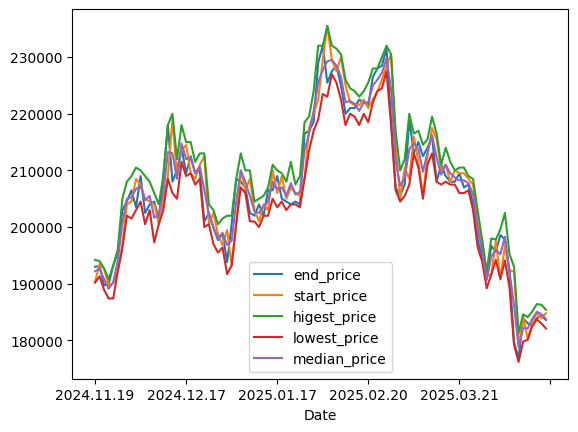

In [46]:
# 기본 선 그래프
all_tables.plot.line()

<Axes: xlabel='Date'>

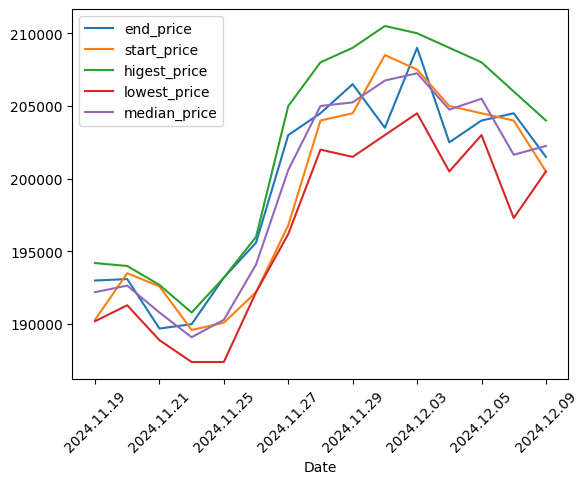

In [47]:
# 선 그래프 구열별로 나눠서 확인

all_tables[:15].plot.line(rot=45)

<Axes: title={'center': 'median_price'}, xlabel='[month]'>

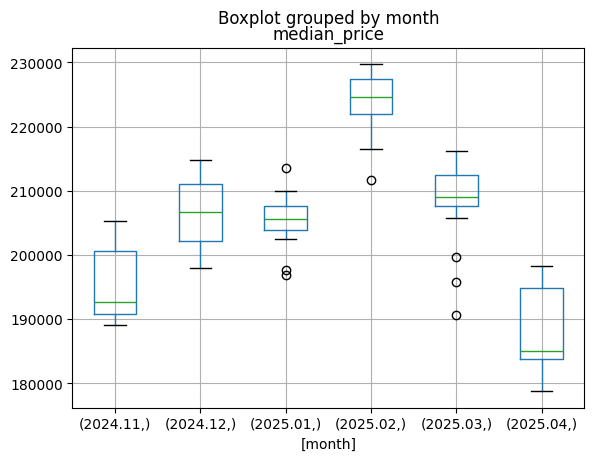

In [48]:
# 상자 수염 그래프
all_tables.boxplot(column=['median_price'], by=['month'])